# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

**PROBMEM STATEMENT**

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe. This potentially has led to 

* `Decline` in new subscribers monthly over past year
* `Revenue loss`

**OBJECTIVE**

The design team has developed a new landing page with an improved layout and more relevant content. The goal is to evaluate its effectiveness and gather insights to help assess its impact on attracting new subscribers.

**Perform Exploratory Data Analysis**

**Sample Data** 

1. Randomly selecting 100 users and divided into two group - control group and treatment group equally
2. Data regarding the interaction of users in both groups with the two versions of the landing page was collected
3. Distribution is a simple random sample from the population
4. Sample observations are independent to each other
5. Time spent on the landing page is in minutes
6. Level of significance --> Type 1 Error --> prob = alpha = 5%

**Answer to following question may help to do the assessment (also called A/B testing)** 

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
4. Is the time spent on the new page the same for the different language users?



## Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [3]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

**Viewing the first and last few rows of the dataset**

In [4]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Shape of the data**

In [6]:
df.shape

(100, 6)

**Information about data types**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**EDA - 5 point summary of the numerical data**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**Check for missing values**

In [9]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Check for duplicates**

In [10]:
df.duplicated().sum()

0

### OBSERVATION ON THE SAMPLE DATA

- **Total Rows:** 100, each with 6 columns:  `user_id`, `group`, `landing_page`, `time_spent_on_the_page`, `converted`, `language_preferred`.


- **No Missing or Duplicate Values**  

- **Data Types:**  
  - **`user_id`**: Integer (Indexed 0 to 99, representing 100 users)  
  - **`time_spent_on_the_page`**: Numerical (Minutes)  
  - **`landing_page`**: Categorical (Old/New)  
  - **`group`**: Categorical  
    - **Control** → Old Landing Page  
    - **Treatment** → New Landing Page  
  - **`converted`**: Categorical (Yes/No)  
  - **`language_preferred`**: Categorical (English, French, Spanish)  
- The time spent is continuous in nature.
  <br>
- **Exploratory Data Analysis:**  
  - **`time_spent_on_the_page`**:  
    - `Minimum` time spent: 19 seconds  
    - `Maximum` time spent: 10.71 minutes  
    - `Average` time spent: 5.37 minutes
  - The `median` time spent (5.41 minutes) is approximately the same as the `mean` time spent (5.37 minutes), which suggests that the data may be approximately normally distributed.
  - The minimum and maximum time spent from the sample data are 19 seconds and 10.71 minutes respectively. This shows that the time spent covers a wide range of values and is continuos in nature.


### Univariate Analysis

**Landing Page**

In [11]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

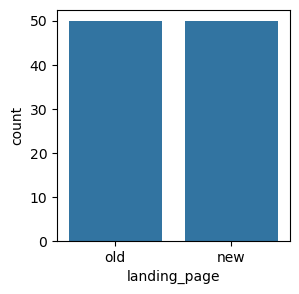

In [12]:
# Bar plot for landing_page
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='landing_page')
plt.show()

**Observation** Out of 100 users, 50 landed on the `new` page and 50 landed on the `old` page

**Group**

In [13]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

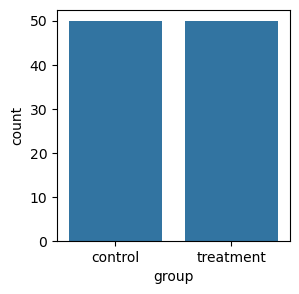

In [14]:
# Bar plot for group
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='group')
plt.show()

**Observation** Out of 100 users, 50 are of `control` group (landed to old page) and other 50 are of `treatment` group (landed on the new page)

**Conversion**

In [15]:
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

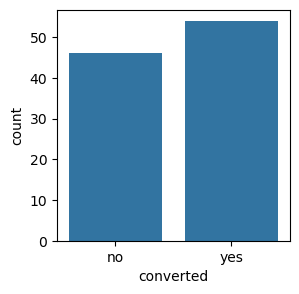

In [16]:
# Bar plot for converted
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='converted')
plt.show()  

**Observation** Out of 100 users, `54 users (54%)` were converted to new subscriber and `46 users (46%)` were not. 

**Language Preferred**

In [17]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

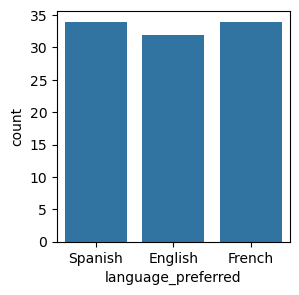

In [18]:
# Bar plot for language_preferred
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='language_preferred')
plt.show() 

**Observation** Out of 100 users, 
    `34 users chose Spanish`
    `34 users chose French`
    `32 users chose English`

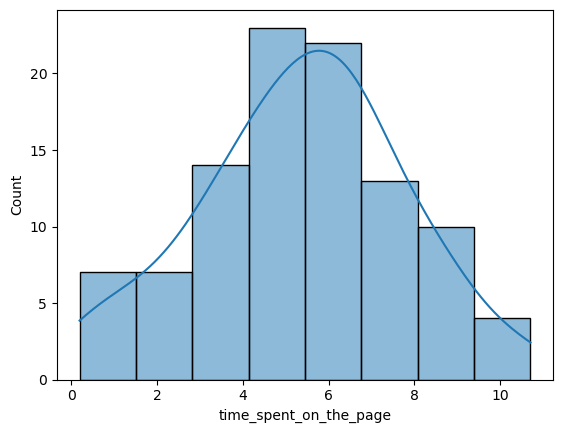

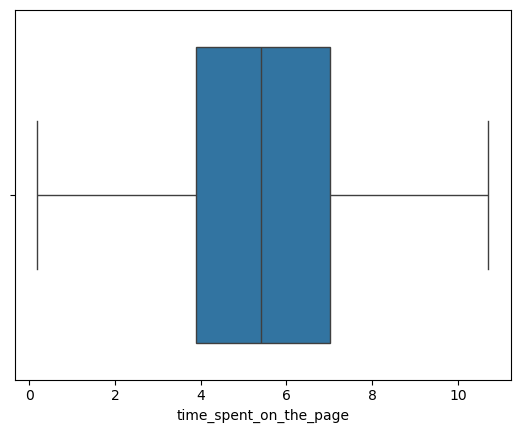

In [19]:
# time_spent_on_the_page
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

**Observation**
- The histogram indicates a **normal distribution** (Simple Sample Distribution).  
- There are **no significant outliers** in the dataset.  
- The **average time spent on the page exceeds 5 minutes**.  

### Bivariate Analysis

 **Conversion vs. Time Spent**

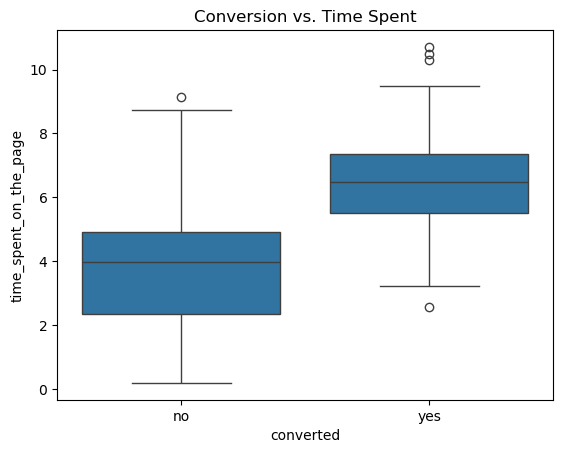

In [20]:
# Boxplot: Conversion vs. Time Spent
sns.boxplot(x='converted', y='time_spent_on_the_page', data=df)
plt.title('Conversion vs. Time Spent');

**Observation**

- Users who did not convert into new subscribers spent less time on the landing page compared to those who did.
    - **This may indicate that non-converting users did not find the content engaging or relevant.**
- One user spent more than 8 minutes on the landing page but still chose not to subscribe, is an outlier. 
- There are a few outliers among converted users who spent more than 10 minutes on the page.  
  - **This suggests that new subscribers found the content engaging and valuable.** 

 **Language vs. Time Spent**

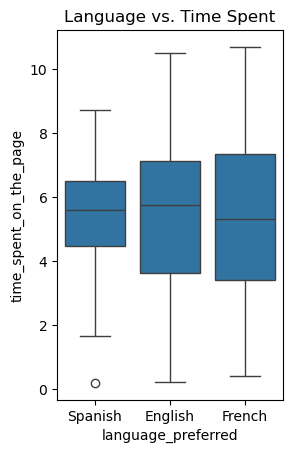

In [21]:
# Boxplot: Language vs. Time Spent
plt.subplot(1, 2, 2)
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df)
plt.title('Language vs. Time Spent');

**Observation**

- Users who prefer Spanish have spent the least amount of time on the landing page. 
- **English and French are preferred over Spanish.**

 **Group vs. Time Spent**

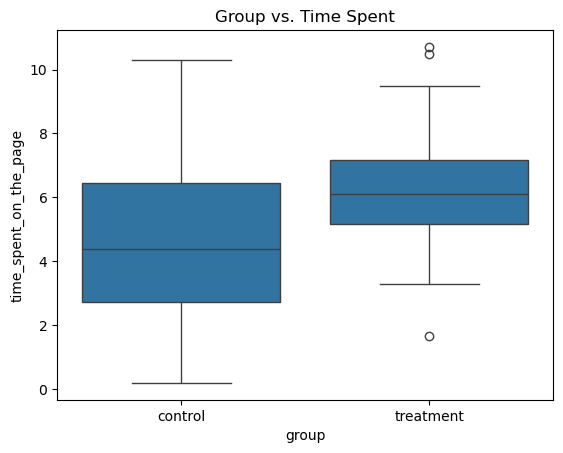

In [22]:
# Boxplot: Group vs. Time Spent
sns.boxplot(x='group', y='time_spent_on_the_page', data=df)
plt.title('Group vs. Time Spent');

**Observation**

- Control group (old landing page) users spend an average of 4 minutes on the page. 
- Treatment group (new landing page) users spend around 6 minutes on the page.  

**This suggests that users find the new design and layout more engaging.**

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

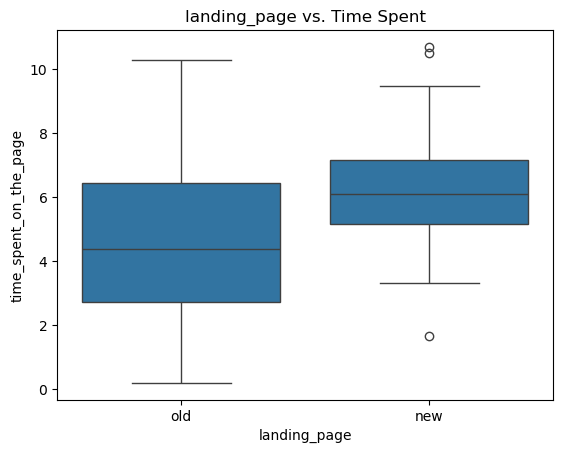

In [23]:
# Boxplot: Landing Page vs. Time Spent
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.title('landing_page vs. Time Spent');

### Step 1: Define the null and alternate hypotheses

The null hypothesis ($H_0$) always represents the status quo or no effect scenario. lets assume $\mu_{\text{new}}$ and $\mu_{\text{old}}$ represents the mean time spent on the new and old landing page 

* Null Hypothesis
$H_0$: Users do not spend more time on the new landing page than the existing landing page. 
(i.e., The time spent on the new landing page is less than or equal to the time spent on the existing landing page.) 
$\mu_{\text{new}} \leq \mu_{\text{old}}$

* Alternative Hypothesis
$H_a$:Users spend more time on the new landing page than the existing landing page. 
(i.e., The time spent on the new landing page is greater than the time spent on the existing landing page.)
$\mu_{\text{new}} \gt \mu_{\text{old}}$

* Since alternative hypothesis is greater than type, its a one-tailed test.


### Step 2: Select Appropriate test

Based on the questionaire - 
`Compare the sample means from 2 independent populations` (`users` visited `old landing page` vs `users` visited `new landing page`).
`Population standard deviation` is unknown. 

**Lets identify the appropriate test based on the hypothesis framework**
* Independent populations - as we are taking random samples for two different type of users, the two samples are from `two independent populations`.
* Continuous data - Yes, the time spent is measured on a `continuous scale`.
* Observations are from a `simple random sample` - Yes, we are informed that the collected sample a simple random sample (`Refer to the FAQ section of the project`)
* Population standard deviation is known - No


**We can use 2-sample ind. t-test for `'MEAN'` to address the problem**

### Step 3: Decide the significance level

Based on the problem statement, it is given that the level of significance aka $\alpha = 0.05$.

In [24]:
# set level of signifiance aka alpha to 0.05 (given)
alpha = 0.05

### Step 4: Collect and prepare data

In [25]:
# Next step is two compute standard deviation for new and old landing page to understand the difference between the 2 std deviations. 
# extract the time_spent on the new page 
ts_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
print('Time spent on the new landing page is:', np.array(ts_new))
print('-----------------------------------------------------------')
# extract the time_spent on the old page
ts_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 
print('Time spent on the old landing page is:', np.array(ts_old))
print('-----------------------------------------------------------')
print('The mean time spent on the new landing page is --> (mu_new) :', round(ts_new.mean(),2))
print('-----------------------------------------------------------')
print('The mean time spent on the old landing page is --> (mu_old):', round(ts_old.mean(),2))
print('-----------------------------------------------------------')
print('The sample standard deviation of the ts_new page is:', round(ts_new.std(),2))
print('The sample standard deviation of the ts_old page is:', round(ts_old.std(),2))
print('-----------------------------------------------------------')

Time spent on the new landing page is: [ 7.13  4.4   4.75  5.25 10.71  5.86  6.03  6.27  8.73  3.65  7.02  6.18
  4.39  9.49  7.81  5.41  1.65  7.16  7.16  3.91  5.37  7.23  8.08 10.5
  5.65  6.47  6.41  8.3   6.01  6.79  7.27  6.7   5.42  5.08  7.46  3.88
  9.12  4.68  5.26  5.74  6.71  3.68  3.3   5.4   8.47  4.94  5.15  7.07
  6.2   5.86]
-----------------------------------------------------------
Time spent on the old landing page is: [ 3.48  3.02  5.28  6.53  2.08  6.21  2.58  8.72  0.4  10.3   3.88  2.66
  7.03  4.05  4.28  3.52  5.39  4.52  4.46  8.5   3.13  6.04  0.19  8.46
  1.92  8.02  0.22  4.71  0.93  1.81  7.4   9.15  4.18  5.47  5.96  6.6
  4.75  2.23  0.4   4.87  6.57  1.44  3.21  2.9   4.3   0.91  6.04  8.35
  3.05  6.52]
-----------------------------------------------------------
The mean time spent on the new landing page is --> (mu_new) : 6.22
-----------------------------------------------------------
The mean time spent on the old landing page is --> (mu_old): 4.53

**Observation**

- $\mu_{\text{new}}$ is 6.22 minutes and  $\mu_{\text{old}}$ is 4.53 minutes. This means, at a discriptive level, data shows that uses spent more time on the `new landing page` compare to `old landing page`.
- To perform, `2-sample ind. t-test` for `'MEAN'` --> data shows that
    1. **`Sample standard deviation`** is **`NOT EQUAL`** between the time spent on the new and old page and so, `equal_var` must set to `False`
    2. `alternative` should be set to `'greater'` - its one-tailed test as $\mu_{\text{new}} \gt \mu_{\text{old}}$

### Step 5: Calculate the p-value

In [26]:
# import test_ind function of scipy --> based on the selected test on step 2. 

from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(ts_new, ts_old, equal_var = False, alternative = 'greater') 
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [27]:
print("=" * 120)
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since we reject the null hypothesis ($H_0$), this means that there is strong statistical evidence to support the claim that users spend more time on the new landing page compared to the existing one. The `p-value` of `0.001` indicates that the probability of observing this result under the assumption that the null hypothesis is true is `extremely low (0.1%)`. This suggests that the increase in time spent on the new landing page is not due to random chance but rather a real effect.

Therefore, based on the one-tailed independent t-test, we can conclude with 99.9% confidence that the new landing page leads to higher user engagement in terms of time spent.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

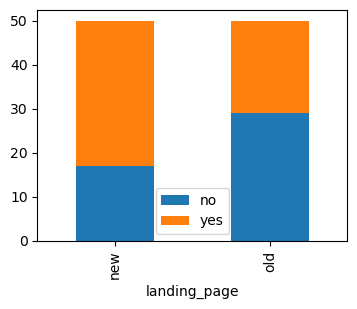

In [28]:
pd.crosstab(df['landing_page'],df['converted']).plot(kind="bar", figsize=(4,3),stacked=True)
plt.legend()
plt.show()

**Observation**

- Bar graph suggests that conversion rate is high for `new landing page` as compare to `old landing page` 

**This infer that users find the new design and layout more engaging and so the conversion rate is high for users visiting the new landing page.**

**However** it is too early to conclude that. So, lets do a `statistical test`.

### Step 1: Define the null and alternate hypotheses

The null hypothesis ($H_0$) always represents the status quo or no effect scenario. Lets assume **`𝑝_𝑛ew`** be the conversion rate for the new landing page and **`p_old`** be the conversion rate for the old landing page.

* Null Hypothesis $H_0:$ The conversion rate for the new page is less than or equal to the conversion rate for the old page.
  **p_new $\leq$ p_old**

* Alternative Hypothesis $H_a:$ The conversion rate for the new page is greater than the conversion rate for the old page.
  **p_new $\gt$ p_old**

* Since alternative hypothesis is greater than type, its a one-tailed test.

### Step 2: Select Appropriate test
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Lets identify the appropriate test based on the hypothesis framework**
* Independent populations - as we are taking random samples for two different type of users, the two samples are from `two independent populations`.
* Compare the sample **`proportions`** from two populations - yes.  
* Observations are from a `simple random sample` - Yes, we are informed that the collected sample a simple random sample (`Refer to the FAQ section of the project`)

**We can use 2-propotional z-test to address the problem**



### Step 3: Decide the significance level
Based on the problem statement, it is given that the level of significance aka $\alpha = 0.05$.

In [29]:
# set level of signifiance aka alpha to 0.05 (given)
alpha = 0.05

### Step 4: Collect and prepare data

#### Perform Descriptive Analysis
**`landing_page` and `converted` both are categorical** <br>

**--> Treatment Group --> New Landing_page --> converted --> yes** <br>
**--> Control Group   --> Old Landing_page --> converted --> yes** <br>


**Find the Proportion Rate Conversion for new landing page (`Treatment Group`) and old landing page (`Control Group`)** 

In [30]:
# crosstab between 'landing_page' and 'converted'
crosstab_result = pd.crosstab(df['landing_page'], df['converted'])
print("Cross Tab : Converted vs Landing Page")
print("=" * 80)
print(crosstab_result.to_string())

#calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

# total number of users in the treatment group
n_treatment = df.group.value_counts()['treatment'] 

# total number of users in the control group
n_control = df.group.value_counts()['control']

# proportion rate conversion for users visiting new landing page
proportion_rate_conversion_new_user = new_converted / n_treatment

# proportion rate conversion for users visiting old landing page
proportion_rate_conversion_old_user = old_converted / n_control

print("=" * 80)
print(f"{'Discriptive Analysis':<72}{'Value'}")
print("=" * 80)
print(f"Number of users served (New Page)                                      : {n_treatment:,}")
print(f"Number of users served (Old Page)                                      : {n_control:,}")
print(f"Users converted in 'Treatment' (New Page)                              : {new_converted:,}")
print(f"Users converted in 'Control' (Old Page)                                : {old_converted:,}")
print(f"Conversion rate for new landing page users in 'Treatment' group        : {proportion_rate_conversion_new_user:.2f}")
print(f"Conversion rate for old landing page users in 'Control' group          : {proportion_rate_conversion_old_user:.2f}")


Cross Tab : Converted vs Landing Page
converted     no  yes
landing_page         
new           17   33
old           29   21
Discriptive Analysis                                                    Value
Number of users served (New Page)                                      : 50
Number of users served (Old Page)                                      : 50
Users converted in 'Treatment' (New Page)                              : 33
Users converted in 'Control' (Old Page)                                : 21
Conversion rate for new landing page users in 'Treatment' group        : 0.66
Conversion rate for old landing page users in 'Control' group          : 0.42


**Observation**

Descriptive analysis shows that conversion rate is higher for treatment group compare to control group, further suggest the new landing page is more engaging to the users and hence, leading to higher conversion rate. 

### Step 5: Calculate the p-value

In [31]:
# import the required function for proportion_ztest
from statsmodels.stats.proportion import proportions_ztest

# calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [32]:
print("=" * 120)
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

- Since we reject the null hypothesis ($H_0$), this means that there is strong statistical evidence to support the claim that the conversion rate for new landing page is higher than that of old landing page. The `p-value` of `0.008` indicates that the probability of observing this result under the assumption that the null hypothesis is true is `very low (0.8%)`.  

- Therefore, based on the one-tailed proportions_ztest, we can conclude with 99.2% confidence that the new landing page leads to higher user engagement in terms of conversion rate compare to the old landing page.


## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

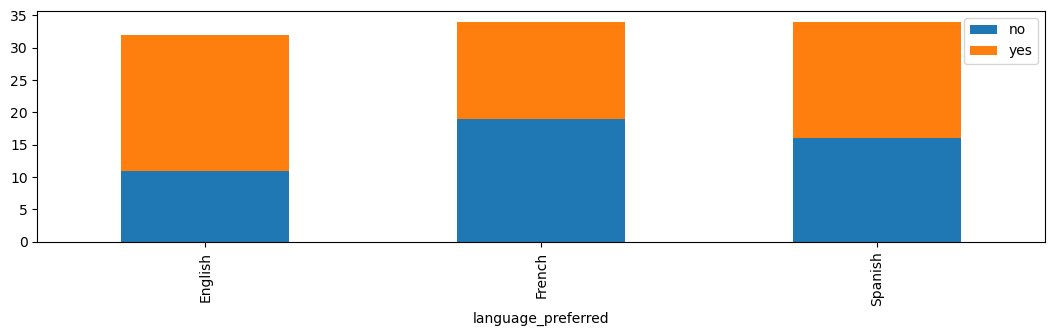

In [33]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted']).plot(kind="bar", figsize=(13,3), stacked=True)
plt.legend()
plt.show()

**Observation**

- Bar graph suggests that conversion rate is high for `English`, followed by `Spanish` and `French`  

**This suggests that users who prefer English have a higher conversion rate, followed by Spanish and French. Therefore, it is likely that the preferred language directly influences the conversion rate, indicating that conversion and preferred language are dependent.**

**However** it is too early to conclude that. So, lets do a `statistical test`.

### Step 1: Define the null and alternate hypotheses

The null hypothesis ($H_0$) always represents the status quo or no effect scenario.  

* Null Hypothesis $H_0:$ The conversion rate is independent of preferred language.

* Alternative Hypothesis $H_a:$  The conversion rate is NOT independent of preferred language.

* Since alternative hypothesis is about to see if conversion rate and preferred language are related, without specifying the direction of the relationship, its a two-tailed test.

### Step 2: Select Appropriate test
Is the conversion and preferred language are independent or related?

**Lets identify the appropriate test based on the hypothesis framework** 

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, `converted (yes/no)` and `language_preferred (english/french/spanish)`.

### Step 3: Decide the significance level

Based on the problem statement, it is given that the level of significance aka $\alpha = 0.05$.

In [34]:
# set level of signifiance aka alpha to 0.05 (given)
alpha = 0.05

### Step 4: Collect and prepare data

In [35]:
# create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
print(contingency_table.to_string())

converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


### Step 5: Calculate the p-value

In [36]:
from scipy.stats import chi2_contingency

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table) 

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [37]:
print("=" * 120)
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- We fail to reject the null hypothesis with a significance level of 0.05, which means we don't have strong evidence to suggest that conversion and preferred language are dependent.
- Failing to reject the null hypothesis does not mean the null hypothesis is true, but that there is not enough evidence to prove the relationship.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

- Need to findout the time spent on the new page for different language users
- create a data frame for users who got served the new landing page

In [38]:
df_new = df[df['landing_page'] == 'new']
df_new

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


In [39]:
# compute mean time_spent for English 
ts_english = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
ts_english_mean = ts_english.mean()
print(f"Average time spent on the page by English-preferred users: {ts_english_mean:.2f} minutes")

# compute mean time_spent for French 
ts_french = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
ts_french_mean = ts_french.mean()
print(f"Average time spent on the page by French-preferred users: {ts_french_mean:.2f} minutes")

# compute mean time_spent for Spanish 
ts_spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'] 
ts_spanish_mean = ts_spanish.mean()
print(f"Average time spent on the page by Spanish-preferred users: {ts_spanish_mean:.2f} minutes")

Average time spent on the page by English-preferred users: 6.66 minutes
Average time spent on the page by French-preferred users: 6.20 minutes
Average time spent on the page by Spanish-preferred users: 5.84 minutes


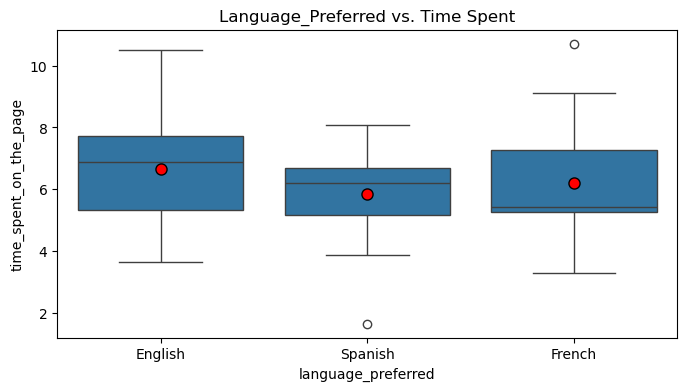

In [40]:
# Visual Analysis
plt.figure(figsize=(8,4))
sns.boxplot(
    x='language_preferred', 
    y='time_spent_on_the_page', 
    data=df_new, 
    showmeans=True, 
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": 8}
)
plt.title('Language_Preferred vs. Time Spent');
plt.show()

**Observation**

The box plot and descriptive analysis both indicate that users who prefer English spend the most time on average, followed by French and Spanish speakers. This suggests that average time spent varies across language preferences

**However** it is too early to conclude that. So, lets do a `statistical test`.

### Step 1: Define the null and alternate hypotheses

The null hypothesis ($H_0$) always represents the status quo or no effect scenario.  

* Null Hypothesis $H_0:$ The mean time spent by all preferred language is same. $\mu_{\text{english}} = \mu_{\text{spanish}} = \mu_{\text{french}}$

* Alternative Hypothesis $H_a:$  At least one mean is different from the others

### Step 2: Select Appropriate test

**Since it is to compare the sample means from 2 or more independent populations, ANOVA test can be performed to address the problem**

**ANOVA Test Assumptions:**

- Samples are independent simple random samples. **Yes**, we are informed that the collected sample a simple random sample (`Refer to the FAQ section of the project`)
- The populations are normally distributed - This can be verified using **Shapiro-Wilk’s** test
- Population variances are equal - This can be verified using **Levene's** test

#### Shapiro-Wilk’s --> To test if populations are normally distributed

We will test the null hypothesis

$H_0:$ time_spent_on_the_page follows a normal distribution
$H_a:$ time_spent_on_the_page does not follow a normal distribution

The shapiro() function of Scipy will be used to compute the test statistic and p-value.

In [41]:
# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

# alpha = 0.05 (given)
print("=" * 120)
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

The p-value is 0.8040016293525696
As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


**Observation** 

**Since p-value of the test is very large, we fail to reject the null hypothesis. It infers that the time_spent_on_the_page follows a normal distribution**

#### Leneve’s --> Population variances are equal

We will test the null hypothesis

$H_0$: All the population variances are equal $H_a$: At least one variance is different from the rest

The levene() function of Scipy will be used to compute the test statistic and p-value.

In [42]:
#import the levene function
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

# alpha = 0.05 (given)
print("=" * 120)
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

The p-value is 0.46711357711340173
As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


**Observation** 

**Since p-value of the test is very large, we fail to reject the null hypothesis. It infers that All the population variances are equal**

#### Step 2.1: Select Appropriate test --> Re-Validate all the assumptions based on the Shapiro-Wilk’s and Levene's test

**Since it is to compare the sample means from 2 or more independent populations, ANOVA test can be performed to address the problem**

**ANOVA Test Assumptions:**

- Samples are independent simple random samples. **Yes**, we are informed that the collected sample a simple random sample (`Refer to the FAQ section of the project`)
- The populations are normally distributed - **Yes**, Based on the **Shapiro-Wilk’s** test done above
- Population variances are equal - **Yes**, Based on the **Levene's** test done above

**This conclude that ANOVA Test can be performed** --> **Test Statistic Distribution** can be **One-way ANOVA F-test**

### Step 3: Decide the significance level

Based on the problem statement, it is given that the level of significance aka $\alpha = 0.05$.

In [43]:
# set level of signifiance aka alpha to 0.05 (given)
alpha = 0.05

### Step 4: Collect and prepare data

In [44]:
print("=" * 140)
print("Time Spent by English-preferred Users:", list(ts_english))
print("=" * 140)
print("Time Spent by French-preferred Users:", list(ts_french))
print("=" * 140)
print("Time Spent by Spanish-preferred Users:", list(ts_spanish))
print("=" * 140)

Time Spent by English-preferred Users: [7.13, 8.73, 3.65, 7.02, 4.39, 9.49, 5.41, 7.16, 3.91, 10.5, 5.65, 5.08, 7.46, 6.71, 8.47, 5.86]
Time Spent by French-preferred Users: [5.25, 10.71, 6.03, 7.81, 5.37, 8.3, 6.01, 6.79, 7.27, 5.42, 9.12, 4.68, 5.26, 3.68, 3.3, 5.4, 4.94]
Time Spent by Spanish-preferred Users: [4.4, 4.75, 5.86, 6.27, 6.18, 1.65, 7.16, 7.23, 8.08, 6.47, 6.41, 6.7, 3.88, 5.74, 5.15, 7.07, 6.2]


### Step 5: Calculate the p-value

In [45]:
# import f_oneway
from scipy.stats import f_oneway

# calculate p_value
test_stat, p_value = f_oneway(ts_english, ts_french, ts_spanish) 

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [46]:
print("=" * 120)
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
print("=" * 120)

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- We fail to reject the null hypothesis, this suggests that there is no statistically significant difference in the time spent on the new page across different language users.
- In conclusion, the time spent on the new page `does not significantly` vary based on the users' language preferences.

## Conclusion and Business Recommendations

___

### Conclusion 

1. Do the users spend more time on the new landing page than on the existing landing page?

   **Yes**, based on the one-tailed independent t-test, we can conclude with 99.9% confidence that the new landing page leads to higher user engagement in terms of time spent.


2. Is the conversion rate for the new page greater than the conversion rate for the old page?

   **Yes**, the new landing page achieves a significantly higher conversion rate than the old one (p-value = 0.008), demonstrating its greater effectiveness in encouraging users to subscribe.

3. Does the converted status depend on the preferred language?

   **No**, the analysis found no statistically significant relationship between a user’s preferred language and their likelihood of converting. This means language preference does not impact the decision to subscribe.

4. Is the time spent on the new page the same for the different language users?

   **Yes**, there is no significant difference in time spent on the new page among users of different language preferences. This suggests that the improvements in design are equally effective across all language groups.

**Business Recommendations**

**Here are the key business recommendations for E-news Express:**

**Implement the New Landing Page:** Since it significantly increases both user engagement and conversion rates, the company should fully roll out the new landing page to all users.

**Personalization is Not Necessary for Language Groups:** Since neither conversion rates nor time spent on the page differ significantly across language groups, additional localization efforts may not be necessary for engagement.

These **`recommendations`** align with the findings and will help the **`company increase user retention and new subscriber growth effectively`**.